<a href="https://colab.research.google.com/github/supersamk13/Machine-Learning-and-Data-Science/blob/main/SpamHamDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spam/Ham Detection System

Problem: Determine whether a message is spam or not

In this notebook, I use Natural Language Processing (NL) techniques, data science, and machine learning to predict spam/ham messages.

In [726]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [727]:
# Load data
df = pd.read_csv('/content/spam.csv', encoding='latin1')

In [728]:
# Remove unnecessary data
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)

In [729]:
# Give meaningful name to columns
df.columns = ['Label', 'Message']

### Understanding the Data

In [730]:
# Retrieve top 5 examples
df.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [731]:
# Shape
df.shape

(5572, 2)

In [732]:
# Nullity
df.isnull().sum()

Label      0
Message    0
dtype: int64

In [733]:
# Get information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [734]:
# Get description of data
df.describe()

,Label,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [735]:
# Get the most common words in spam messages
df[df['Label'] == 'spam']['Message'].str.split().explode().value_counts().head(10)

to      604
a       358
your    187
or      185
call    185
the     178
for     169
2       169
you     164
is      143
Name: Message, dtype: int64

In [736]:
# Get the most common words in ham messages
df[df['Label'] == 'ham']['Message'].str.split().explode().value_counts().head(10)

to     1530
you    1458
I      1436
the    1019
a       969
and     738
i       736
in      734
u       645
is      638
Name: Message, dtype: int64

### Exploratory Data Analysis

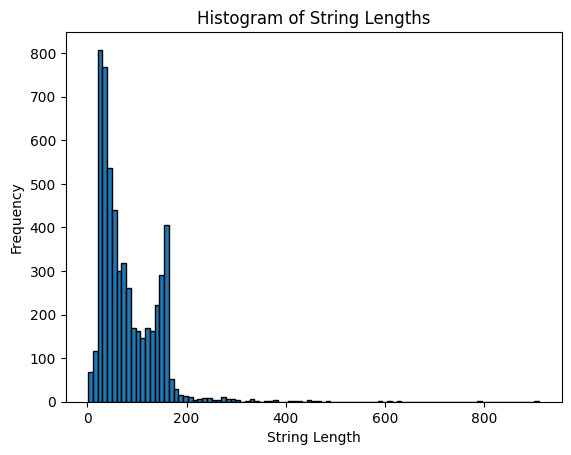

In [737]:
# Plot the histogram of string lengths
plt.hist(df['Message'].apply(len), bins='auto', edgecolor='black')
plt.xlabel('String Length')
plt.ylabel('Frequency')
plt.title('Histogram of String Lengths')
plt.show()

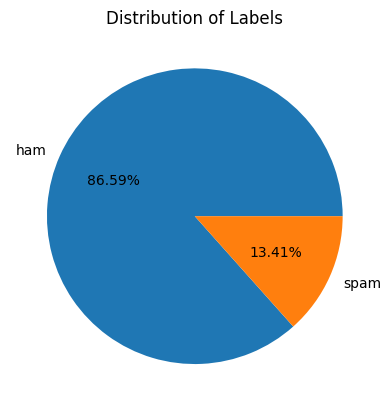

In [738]:
# Pie chart of label counts
label_counts = df['Label'].value_counts()
plt.pie(label_counts, labels=['ham', 'spam'], autopct='%.2f%%')
plt.title('Distribution of Labels')
plt.show()

### Data Preprocessing

In [739]:
def preprocess(msg):
  # Convert the text to lower case
  msg = msg.lower()
  # Remove leading and trailing spaces
  msg = msg.strip()
  # Remove HTML tags
  msg = msg.replace('<[^<]+?>', '')
  # Remove special characters
  msg = msg.replace('[^a-zA-Z]', ' ')
  # Remove extra whitespaces
  msg = msg.replace('\\s+', ' ')
  # Tokenization
  words = nltk.word_tokenize(msg)
  # Remove stop words
  stop_words = nltk.corpus.stopwords.words('english')
  msg = ' '.join([word for word in words if word not in stop_words])
  # Perform lemmatization
  lemmatizer = WordNetLemmatizer()
  words = nltk.word_tokenize(msg)
  msg = ' '.join([lemmatizer.lemmatize(word) for word in words])
  return msg


In [740]:
# Apply data preprocessing to message
df['Message'] = df['Message'].apply(lambda x: preprocess(x))

### Feature Engineering

In [741]:
df['Label'] = df['Label'].map({'ham': 0, 'spam': 1})

###Dataset Development

In [742]:
# Split data set into x and y, training and testin
x_train, x_test, y_train, y_test = train_test_split(df['Message'], df['Label'], random_state=0)

In [743]:
# Transform training and testing messages to word frequency vector representations
count_vector = CountVectorizer()
x_train = count_vector.fit_transform(x_train)
x_test = count_vector.transform(x_test)

### Model Development

In [744]:
# Use Naive Bayes model for text classification
naive_bayes = MultinomialNB()
naive_bayes.fit(x_train, y_train)
predictions = naive_bayes.predict(x_test)

### Evaluate Model

In [745]:
print('Accuracy Score: ', accuracy_score(y_test, predictions))
print('Precision Score: ', precision_score(y_test, predictions))
print('Recall Score: ', recall_score(y_test, predictions))
print('f1 Score: ', f1_score(y_test, predictions))

Accuracy Score:  0.9870782483847811
Precision Score:  0.9735449735449735
Recall Score:  0.934010152284264
f1 Score:  0.9533678756476683


In [746]:
# Form prediction based on message
def predMsg(msg):
  msg = preprocess(msg)
  msg = count_vector.transform([msg])
  return naive_bayes.predict(msg)

In [747]:
# Example
myMsg = "Call now to enter into the free raffle and win a big prize!"
print(predMsg(myMsg))
myMsg = "How was the trip to your cousins?"
print(predMsg(myMsg))

[1]
[0]


In [748]:
# Save the model and vectorizer
joblib.dump(naive_bayes, 'naive_bayes_model.pkl')
joblib.dump(count_vector, 'count_vectorizer.pkl')

['count_vectorizer.pkl']